In [1]:
import statsmodels.api as sm
boston = sm.datasets.get_rdataset("Boston", package="MASS").data

In [3]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
X = boston[['lstat']]   # predictor - A socioeconomic feature. Higher values → neighborhoods with more lower-income residents.
y = boston['medv']      # response - Median value of owner-occupied homes (in $1000s)

In [9]:
import numpy as np
import pandas as pd


k_values = np.arange(1, 201, 5)
n = len(X)
split = n // 2
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [11]:
n

506

# Homework 2.a

In [49]:
# Homework 2.a - No AI support allowed, please get the info you need from https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
  # generate an array of size split (n//2) and save the array as split_idx
  # make a new random X_train, y_train by selecting the data on the rows corresponding to split_idx
  # make a new test dataset X_test, y_test by selecting the data "not" on the rows corresponding to split_idx

split_idx = np.random.choice(n, size=split, replace=False)
X_train, y_train = X.iloc[split_idx], y.iloc[split_idx]
X_test, y_test = X.drop(split_idx), y.drop(split_idx)

In [53]:
from sklearn.neighbors import KNeighborsRegressor

# Fit KNN with k = 30
knn = KNeighborsRegressor(n_neighbors=30)
knn.fit(X_train, y_train)

# Perform prediction
fitted_values = knn.predict(X_train)

# Combine results into DataFrame
results = pd.DataFrame({'predictor_lstat': X_train.values.ravel(), 'predicted_medv': fitted_values})
print(results.head())



   predictor_lstat  predicted_medv
0            13.09       20.406667
1             7.70       25.166667
2             6.27       27.676667
3             4.74       32.900000
4            13.65       20.203333


# Homework 2.b

In [74]:
# Homework 2.b - No AI support allowed, please get the info from google search including pythong Package APIs like https://numpy.org/doc/stable/reference/
# Without using KNeighborsRegressor, code your own Kneighborhood regression.
# You can use numpy package only. You are "not" allowed to use scikit-learn.
 
k = 7
y_pred = []

for x in X_test.values:  
    distances = []        # list to store distances
    
    for xi in X_train.values:   # loop over each training point
        dist = np.linalg.norm(x - xi)  
        distances.append(dist)
    
    distances = np.array(distances)
    knn_idx = distances.argsort()[:k]  
    
    y_pred_value = np.mean(y_train.values[knn_idx])  
    y_pred.append(y_pred_value)

For each test sample, the code calculates the Eudlidean distance to every training sample and store them into list - distance. Then, the code find the K nearest neighbors (the K smallest distance between X_test and X_train). Finally, the predicted value y is obtained by calculating the mean of target values of neighbors. All predicted values are collected into the array form for evaluation.

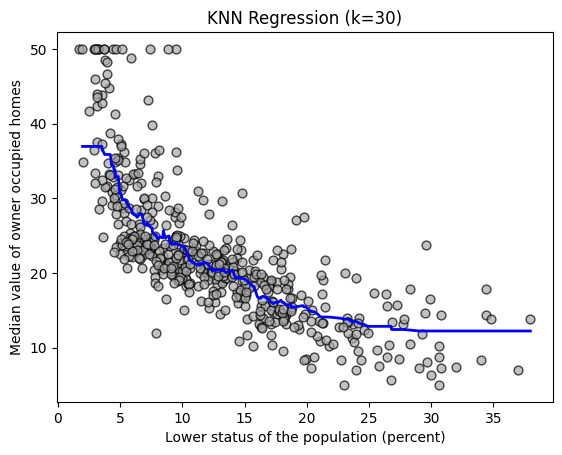

In [78]:
import matplotlib.pyplot as plt

# Scatter plot of the data
plt.scatter(boston['lstat'], boston['medv'],
            color='darkgray', edgecolor='k',
            s=40, alpha=0.7)

# Add fitted KNN line
predicted_values = knn.predict(X_test)

order = np.argsort(X_test.values.ravel())

plt.plot(X_test.values.ravel()[order], predicted_values[order], color='blue', linewidth=2)

# Labels
plt.xlabel("Lower status of the population (percent)")
plt.ylabel("Median value of owner occupied homes")
plt.title("KNN Regression (k=30)")

plt.show()

In [81]:
from sklearn.datasets import make_moons
import numpy as np
import pandas as pd

# 1) Generate two-moons data
#X, y = make_moons(n_samples=300, noise=.3, random_state=42)
X, y = make_moons(n_samples=(250, 50), noise=.3, random_state=42)

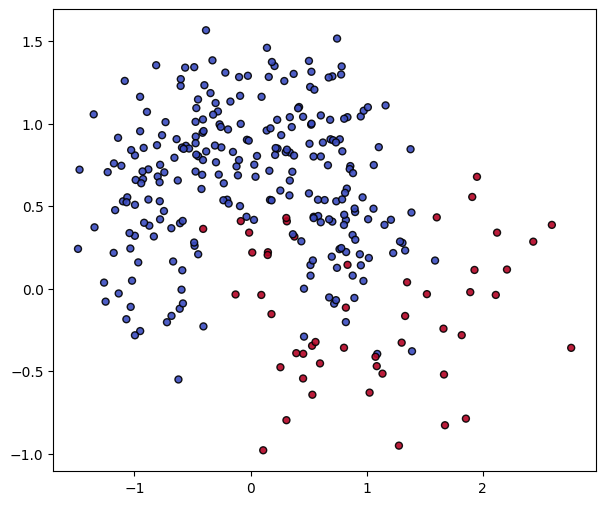

In [85]:

import matplotlib.pyplot as plt
plt.figure(figsize=(7, 6))

# Training points
plt.scatter(X[:,0], X[:,1], c=y, s=25, edgecolor='k', alpha=0.9, label='train', cmap=plt.cm.coolwarm)

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

The `stratify` parameter in `train_test_split` ensures that the proportion of classes in the original dataset is preserved in both the training and testing sets. This is particularly useful when dealing with imbalanced datasets to ensure that each class is adequately represented in both sets.

In [89]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, roc_auc_score)

In [91]:
from sklearn.neighbors import KNeighborsClassifier
# 2) Fit KNN classifier
k = 30  # <- change k to see different boundaries
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred_tr = knn.predict(X_train)

In [97]:
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [135]:
# 5) Confusion matrix (labels assumed 0=negative, 1=positive)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0,1]).ravel()

# 6) Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
recall = recall_score(y_test, y_pred, pos_label=1)  # = Sensitivity / TPR
specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan
f1 = f1_score(y_test, y_pred, pos_label=1)
youden_j = recall + specificity - 1 if not np.isnan(specificity) else np.nan




# 7) Present metrics in a small table
metrics_df = pd.DataFrame({
    "metric": ["accuracy", "sensitivity (recall)", "specificity", "precision", "f1", "youden's J"],
    "value_test": [accuracy, recall, specificity, precision, f1, youden_j]
})

# Homework 2.c

In [153]:

# Homework 2.c) 1. compute tn, fp, fn, tp by using y_test, y_pred without using confusion_matrix
tn = np.sum((y_test == 0) & (y_pred == 0))
fp = np.sum((y_test == 0) & (y_pred == 1))
fn = np.sum((y_test == 1) & (y_pred == 0))
tp = np.sum((y_test == 1) & (y_pred == 1))
# Homework 2.c) 2. compute accuracy, precisin, recall, specificity, f1, youden_j, without using sklearn functions. compute by your own.
accuracy = (tp + tn) / (tp + tn + fn + fp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
f1 = 2 * precision * recall / (precision + recall)
youden_j = recall + specificity - 1

# Present metrics in a small table
metrics_df_my_own = pd.DataFrame({
    "metric": ["accuracy", "sensitivity (recall)", "specificity", "precision", "f1", "youden's J"],
    "value": [accuracy, recall, specificity, precision, f1, youden_j]
})
# Homework 2.c) print the following and check that they become 0s.
print(metrics_df_my_own["value"].values - metrics_df["value_test"].values)



[0. 0. 0. 0. 0. 0.]


In [155]:
import pandas as pd
from sklearn.datasets import load_wine
wine = load_wine()

# Features and target
X = wine.data
y = wine.target
df = pd.DataFrame(X, columns=wine.feature_names)
df.head()
#class_0 (Cultivar 1), class_1 (Cultivar 2), class_2 (Cultivar 3) (cultivar: cultivated variety)
#alcohol → % alcohol content of the wine.
#malic_acid → concentration of malic acid (a dicarboxylic acid; gives tart taste, found in apples, grapes).

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [157]:
unique, counts = np.unique(y, return_counts=True)
unique, counts

(array([0, 1, 2]), array([59, 71, 48], dtype=int64))

In [159]:
# Use only two predictors: Alcohol and Malic
X = df[["alcohol", "malic_acid"]]

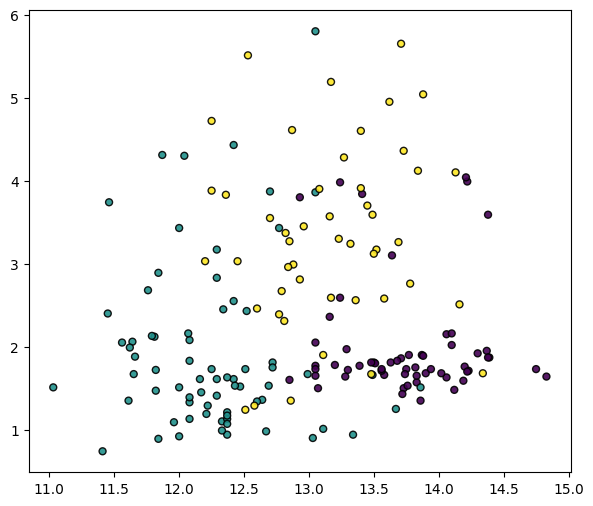

In [161]:
plt.figure(figsize=(7, 6))

# Training points
plt.scatter(X["alcohol"], X["malic_acid"], c=y, s=25, edgecolor='k', alpha=0.9, label='train')

# Homework 2.d

In [165]:
from sklearn.model_selection import train_test_split
# Homework 2.d
# split the data into
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# Homework 2.f

In [167]:
from sklearn.neighbors import KNeighborsClassifier
# Homework 2.f) Fit a 30-NN classifier
knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)

# Homework 2.f) make a prediction on X_test
y_pred = knn.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Test accuracy: {accuracy:.3f}")

Test accuracy: 0.741


# Homework 2.g

This code evaluates the different K values (1 to 49) to test the performance of KNN classifier performance. For each K value, the model will be trained on the tranning set and predict the responsive labels of test sets. The prediction accuracy is calculated by dividng the right prediction to the true values and store the outcomes to the dictionary (accu_results = {}). Finally, the results transform to a DataFrame to show how the classification accuracy varies with different K values.

In [169]:
# run the following to make a graph
k_values = np.arange(1, 50, 1)
accu_results = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    accu_results[k] = accuracy

# Show results
accu_df = pd.DataFrame(list(accu_results.items()), columns=["k", "ACCURACY"])
print(accu_df)

# Homework 2.g) explain the above code in this code chunck
# This code evaluates the different K values (1 to 49) to test the performance of KNN classifier performance.
# For each K value, the model will be trained on the tranning set and predict the responsive labels of test sets.
# The prediction accuracy is calculated by dividng the right prediction to the true values and store the outcomes to the dictionary (accu_results = {}).
# Finally, the results transform to a DataFrame to show how the classification accuracy varies with different K values.


     k  ACCURACY
0    1  0.759259
1    2  0.685185
2    3  0.777778
3    4  0.777778
4    5  0.740741
5    6  0.777778
6    7  0.740741
7    8  0.759259
8    9  0.722222
9   10  0.759259
10  11  0.759259
11  12  0.759259
12  13  0.740741
13  14  0.777778
14  15  0.796296
15  16  0.796296
16  17  0.796296
17  18  0.796296
18  19  0.796296
19  20  0.796296
20  21  0.796296
21  22  0.777778
22  23  0.777778
23  24  0.740741
24  25  0.759259
25  26  0.740741
26  27  0.759259
27  28  0.740741
28  29  0.740741
29  30  0.740741
30  31  0.740741
31  32  0.740741
32  33  0.740741
33  34  0.740741
34  35  0.740741
35  36  0.759259
36  37  0.759259
37  38  0.777778
38  39  0.777778
39  40  0.759259
40  41  0.759259
41  42  0.759259
42  43  0.759259
43  44  0.759259
44  45  0.759259
45  46  0.759259
46  47  0.759259
47  48  0.759259
48  49  0.777778


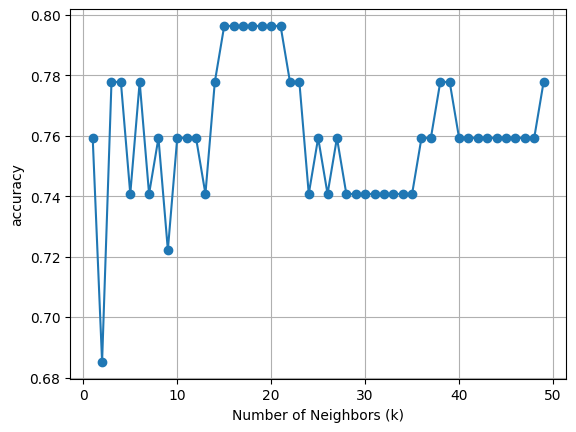

In [ ]:
#plt.figure(figsize=(8,5))
plt.plot(accu_df["k"], accu_df["ACCURACY"], marker="o", linestyle="-")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("accuracy")
plt.grid(True)
plt.show()

In [173]:
dfs = []
for r_s in range(10): #30, 100
  X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42*r_s, stratify=y)

  accu_results = []

  for k in k_values:
      knn = KNeighborsClassifier(n_neighbors=k)
      knn.fit(X_train, y_train)
      y_pred = knn.predict(X_test)
      accuracy = np.mean(y_pred == y_test)
      accu_results.append(accuracy)

  # Show results
  accu_df = pd.DataFrame(accu_results, columns=[ "ACCURACY"])
  dfs.append(accu_df)


In [175]:

accu_df = pd.concat(dfs, axis=1).mean(axis=1)
accu_df = pd.DataFrame(accu_df, columns=["ACCURACY"])
accu_df.head()


,ACCURACY
0,0.751852
1,0.748148
2,0.792593
3,0.800000
4,0.794444


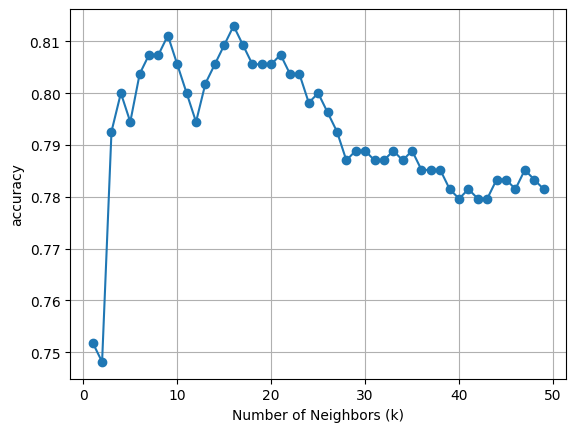

In [ ]:
#plt.figure(figsize=(8,5))
plt.plot(k_values, accu_df["ACCURACY"], marker="o", linestyle="-")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("accuracy")
plt.grid(True)
plt.show()